In [1]:
from collections import defaultdict

def parse_data (f_name, num):
    summoner_champions = defaultdict(list)    # key is summoner_id, val is the list of champions this user played
                                              # champions representation is (champion_id, champion_level, champion_points)
    summoner_rank = defaultdict(int)          # key is summoner_id, val is the rank
    champions_summoner = defaultdict(list)    # key is champion_id, val is the list of user_id who played this champion
    
    # skip = 0
    index = 0
    with open (f_name) as f:
        for line in f:
            if index >= num: break
            
            data = line.strip().split('-')
            if len(data) != 3:
                # skip += 1
                summoner = data[-3].split(',')[-1]
                champ_list = data[-2]
                rank = data[-1]
#                 for d in data:
#                     print(d)
#                 continue
            #summoner = 's_' + data[0]
            else:
                summoner = data[0]
                champ_list = data[1]
                rank = data[2]
            
            # process champ_list to get the list of tuples
            champ_list = champ_list.split(',')
            for i in range(len(champ_list)):
                champ_list[i] = champ_list[i].replace('(', '').replace(')', '')
            temp = []
            c_list = []
            for i in range(len(champ_list)):
                if champ_list[i] == '': continue
                    
                if i%3 == 0:
                    #temp.append('c_' + champ_list[i])
                    temp.append(champ_list[i])
                else:
                    temp.append(int(champ_list[i]))
                    
                if i%3 == 2:
                    c_list.append(tuple(temp))
                    temp = []
                i += 1
            
            summoner_champions[summoner] = c_list
            summoner_rank[summoner] = int(rank)
            for champ, l, p in c_list:
                champions_summoner[champ].append(summoner)
            
            index += 1
    #print(skip, 'lines were skipped.')        
    return summoner_champions, summoner_rank, champions_summoner

In [2]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 2)
print(summoner_champions, '\n')
print(summoner_rank, '\n')
print(champions_summoner, '\n')

defaultdict(<class 'list'>, {'28347163': [('115', 5, 36488), ('412', 4, 16670), ('111', 3, 12345), ('420', 3, 12141), ('203', 3, 11308), ('3', 3, 10221), ('101', 3, 9007), ('74', 3, 8821), ('498', 3, 8423), ('150', 3, 8271), ('53', 3, 8147), ('45', 3, 7099), ('33', 3, 6748), ('41', 3, 6398), ('202', 3, 6240), ('161', 2, 5355), ('104', 2, 4824), ('9', 2, 4616), ('4', 2, 4523), ('35', 2, 4067), ('16', 2, 4047), ('90', 2, 4016), ('201', 2, 3990), ('25', 2, 3758), ('12', 2, 3756), ('30', 2, 3722), ('61', 2, 3513), ('240', 2, 3441), ('38', 2, 3396), ('99', 2, 3305), ('57', 2, 3203), ('432', 2, 3033), ('26', 2, 3001), ('31', 2, 2916), ('163', 2, 2914), ('44', 2, 2805), ('7', 2, 2758), ('136', 2, 2720), ('18', 2, 2647), ('24', 2, 2597), ('86', 2, 2519), ('236', 2, 2495), ('63', 2, 2450), ('17', 2, 2436), ('121', 2, 2430), ('34', 2, 2386), ('79', 2, 2298), ('103', 2, 2262), ('42', 2, 2237), ('157', 2, 2174), ('51', 2, 2156), ('98', 2, 2072), ('267', 2, 2059), ('113', 2, 1879), ('1', 2, 1853), 

In [3]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 60000)

In [4]:
import matplotlib

print('There are', len(summoner_champions), 'summoners.')
print('There are', len(champions_summoner), 'champions.')

# Find top 50 most popular champions
champions_count = defaultdict(int)
for user, champ_list in summoner_champions.items():
    for champ, l, p in champ_list:
        champions_count[champ] += 1
        
popular_champs = [(champions_count[x], x) for x in champions_count]
popular_champs.sort()
popular_champs.reverse()
print(popular_champs[:50])

There are 51139 summoners.
There are 141 champions.
[(44777, '22'), (42265, '21'), (42122, '11'), (41993, '99'), (41880, '53'), (41690, '1'), (41173, '86'), (41062, '25'), (40658, '15'), (40257, '63'), (40176, '81'), (39978, '412'), (39883, '51'), (39785, '45'), (39362, '16'), (39099, '17'), (39041, '19'), (39010, '222'), (38968, '67'), (38762, '122'), (38762, '103'), (38537, '157'), (38502, '29'), (38396, '10'), (38359, '18'), (38111, '24'), (37898, '75'), (37822, '202'), (37408, '4'), (37331, '110'), (37302, '54'), (36889, '236'), (36877, '37'), (36873, '13'), (36868, '32'), (36796, '40'), (36734, '9'), (36692, '20'), (36305, '55'), (36268, '31'), (36196, '104'), (36133, '245'), (36103, '92'), (36025, '238'), (35963, '39'), (35952, '119'), (35806, '5'), (35744, '89'), (35682, '64'), (35602, '78')]


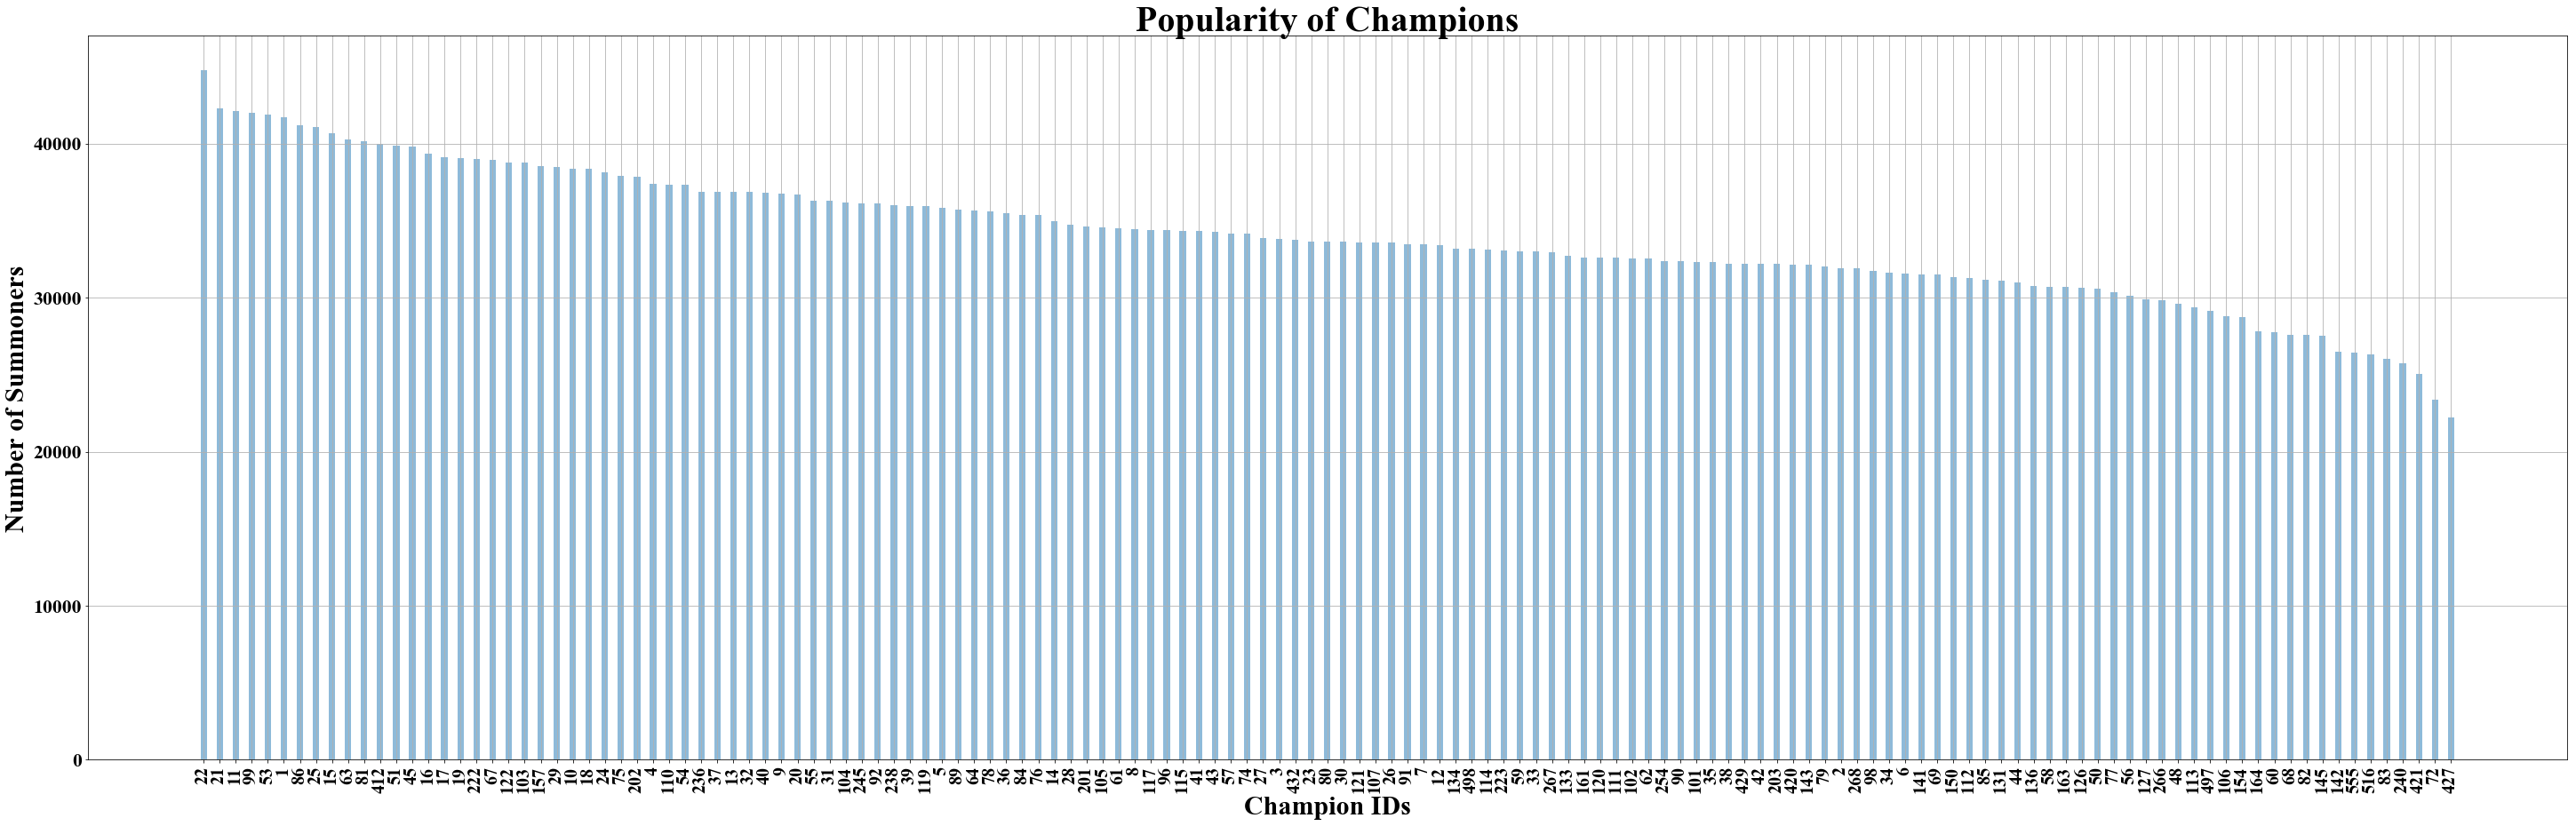

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

x_plot = [champ for count, champ in popular_champs]
y_plot = [count for count, champ in popular_champs]
 
y_pos = np.arange(len(x_plot))

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, ax = plt.subplots(figsize=(50,15))
plt.bar(y_pos, y_plot, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, x_plot,rotation=90, fontsize=20)
plt.xlabel('Champion IDs', fontsize=30)
plt.ylabel('Number of Summoners',fontsize=30)
plt.title('Popularity of Champions',fontsize=40)
plt.grid(True)
 
plt.show()

In [6]:
popular_champs[-1]

(22223, '427')

In [7]:
popular_champs[-1]

(22223, '427')

In [8]:
actual_champions_count = defaultdict(int)
for user, champ_list in summoner_champions.items():
    for champ, l, p in champ_list:
        if l >= 3:
            actual_champions_count[champ] += 1
actual_popular_champs = [(actual_champions_count[x], x) for x in actual_champions_count]
actual_popular_champs.sort()
actual_popular_champs.reverse()
print(actual_popular_champs[:50])

[(26674, '22'), (25727, '99'), (24314, '53'), (24187, '21'), (24009, '81'), (23715, '51'), (23066, '202'), (22163, '25'), (21921, '412'), (21773, '222'), (21555, '18'), (21503, '17'), (21370, '11'), (21004, '67'), (20944, '236'), (20113, '45'), (19787, '103'), (19532, '1'), (19424, '86'), (19277, '24'), (19189, '15'), (19162, '63'), (19091, '157'), (18888, '75'), (18450, '29'), (18397, '104'), (18120, '110'), (17838, '245'), (17756, '122'), (17150, '64'), (17116, '19'), (17038, '54'), (16848, '89'), (16662, '16'), (16470, '37'), (16416, '238'), (16166, '5'), (15708, '105'), (15547, '12'), (15347, '40'), (15248, '31'), (14930, '4'), (14908, '43'), (14899, '121'), (14494, '61'), (14442, '39'), (14419, '498'), (14067, '111'), (13967, '117'), (13917, '201')]


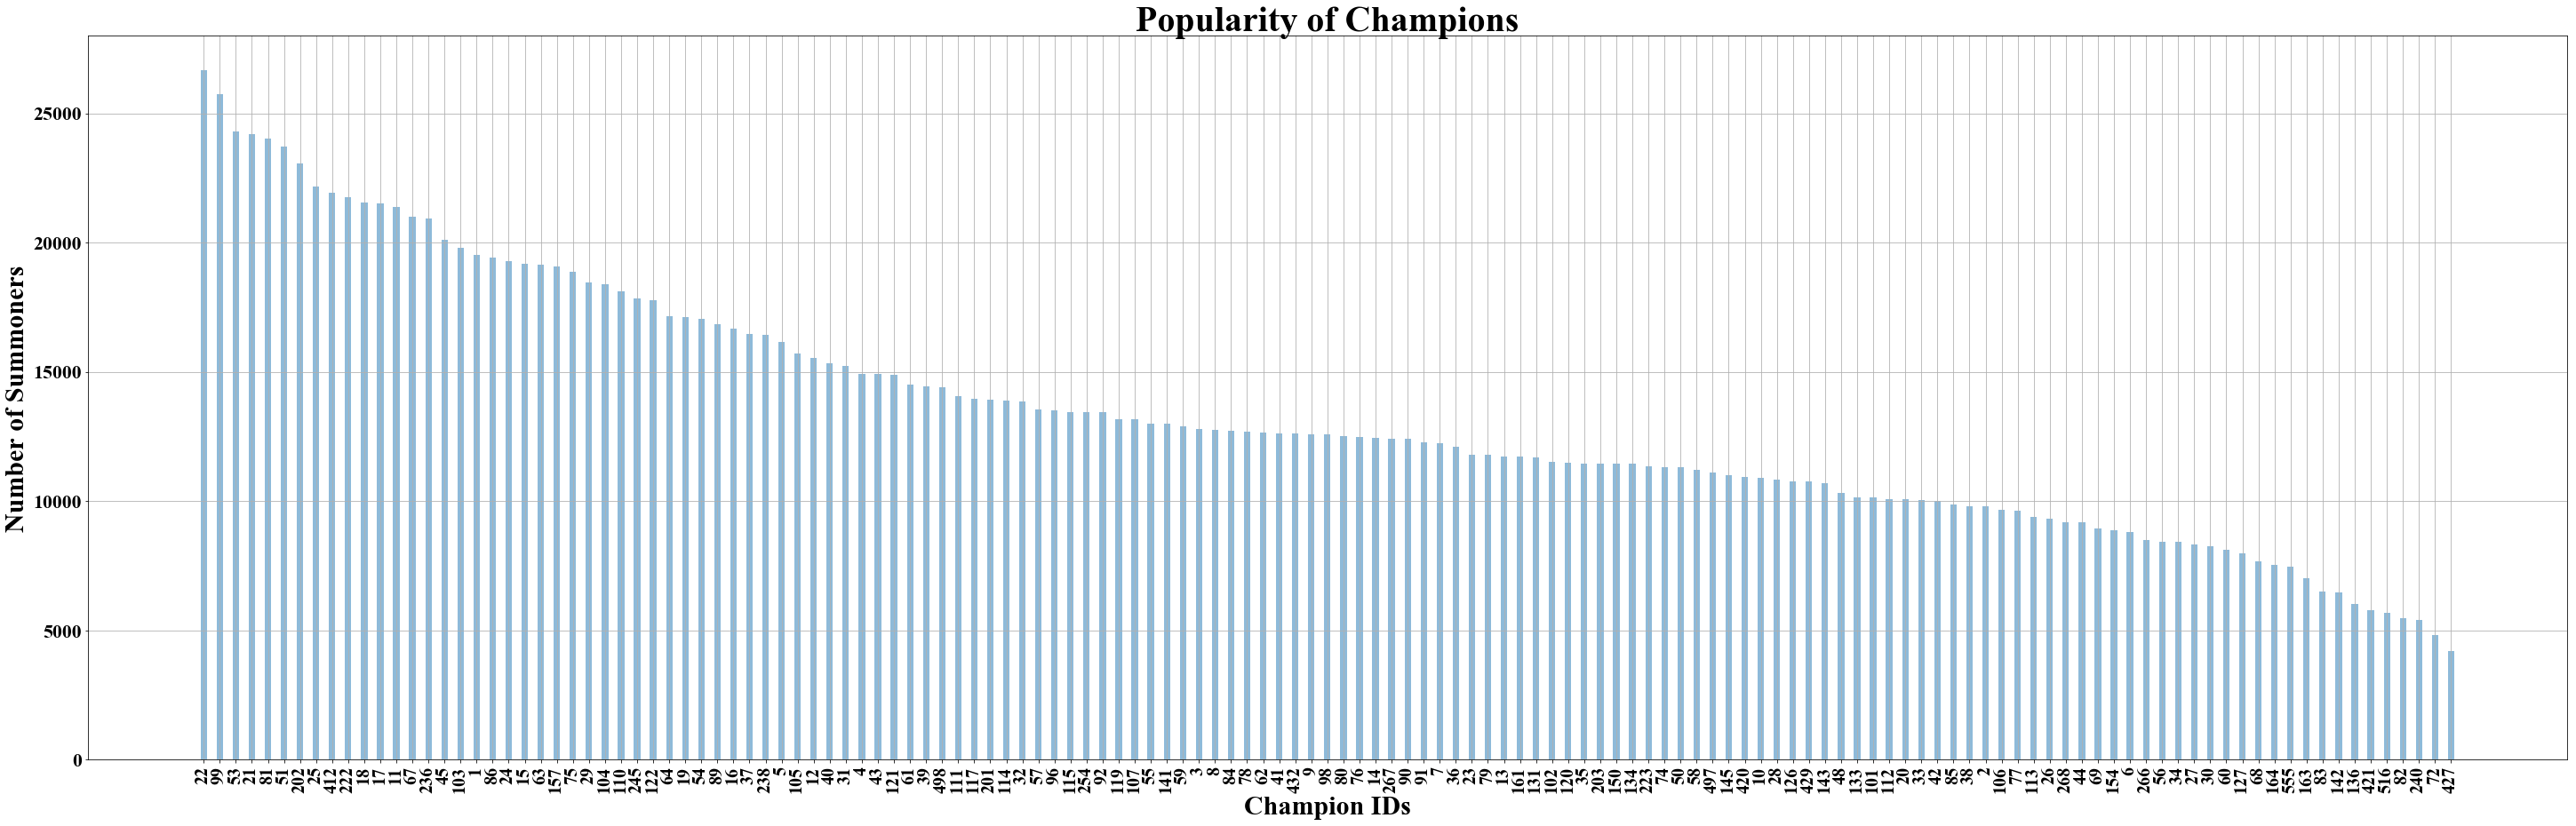

In [9]:
%matplotlib inline

x_plot = [champ for count, champ in actual_popular_champs]
y_plot = [count for count, champ in actual_popular_champs]
 
y_pos = np.arange(len(x_plot))

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, ax = plt.subplots(figsize=(50,15))
plt.bar(y_pos, y_plot, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, x_plot,rotation=90, fontsize=20)
plt.xlabel('Champion IDs', fontsize=30)
plt.ylabel('Number of Summoners',fontsize=30)
plt.title('Popularity of Champions',fontsize=40)
plt.grid(True)
 
plt.show()

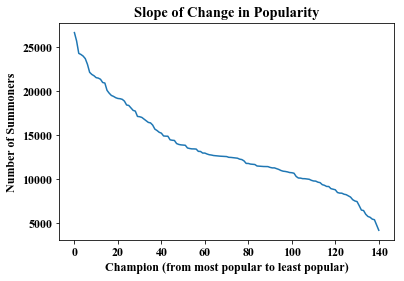

In [10]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.plot(y_pos, y_plot)
plt.xlabel('Champion (from most popular to least popular)')
plt.ylabel('Number of Summoners')
plt.title('Slope of Change in Popularity')
plt.show()

In [11]:
rank_count = defaultdict(int)
for summoner, rank in summoner_rank.items():
    rank_count[rank] += 1

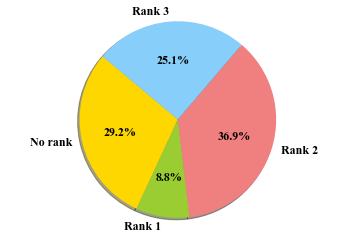

In [12]:
# Data to plot
labels = 'No rank', 'Rank 1', 'Rank 2', 'Rank 3'
sizes = [rank_count[x] for x in range(4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [13]:
import json
def parse_champion_info():
    champ_type = {}
    champ_info = {}
    with open('DataCrawling/championInfo.json', 'r') as f:
        d = json.load(f)

    #i = 0
    for champ, champ_dict in d['data'].items():
        #if i > 3: break
        #print(champ_dict)
        champ_id = champ_dict['key']
        champ_tags = champ_dict['tags']
        champ_information = champ_dict['info']
        
        champ_type[champ_id] = champ_tags
        champ_info[champ_id] = champ_information
        #i += 1
        
    return champ_type, champ_info

In [14]:
champ_type, champ_info = parse_champion_info()

In [15]:
mage = []
support = []
fighter = []
tank = []
marksman = []
assassin = []
i = 0
for summoner, champ_list in summoner_champions.items():
    if i > 10: break
    temp = [(p, l, champ) for champ, l, p in champ_list]
    temp.sort()
    temp.reverse()
    type_count = defaultdict(int)
    for p, l, c in temp:
        tags = champ_type[c]
        for t in tags:
            type_count[t] += 1
            
    total = sum(list(type_count.values()))       
    for ty in type_count:
        type_count[ty] /= total
    mage.append(type_count['Mage'])
    support.append(type_count['Support'])
    fighter.append(type_count['Fighter'])
    tank.append(type_count['Tank'])
    marksman.append(type_count['Marksman'])
    assassin.append(type_count['Assassin'])
    #print(type_count)
    i+=1
     

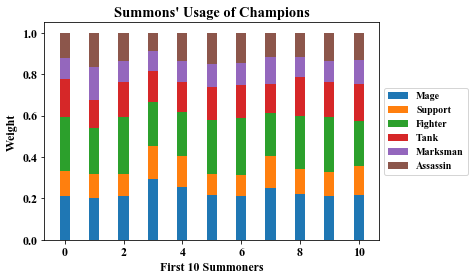

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

N = len(mage)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, mage, width)
p2 = plt.bar(ind, support, width, bottom=mage)
p3 = plt.bar(ind, fighter, width, bottom=np.array(mage)+ np.array(support))
p4 = plt.bar(ind, tank, width, bottom=np.array(fighter) + np.array(mage)+ np.array(support))
p5 = plt.bar(ind, marksman, width, bottom=np.array(tank) + np.array(fighter) + np.array(mage)+ np.array(support))
p6 = plt.bar(ind, assassin, width, bottom=np.array(marksman) + np.array(tank) + np.array(fighter) + np.array(mage)+ np.array(support))

plt.ylabel('Weight')
plt.xlabel('First 10 Summoners')
plt.title('Summons\' Usage of Champions')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Mage', 'Support', 'Fighter', 'Tank', 'Marksman', 'Assassin'), prop=fontP,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [17]:
j = 4
mage[j] + support[j] + fighter[j] + tank[j] + marksman[j] + assassin[j]

1.0

In [23]:
champ_info

{'266': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
 '103': {'attack': 3, 'defense': 4, 'magic': 8, 'difficulty': 5},
 '84': {'attack': 5, 'defense': 3, 'magic': 8, 'difficulty': 7},
 '12': {'attack': 6, 'defense': 9, 'magic': 5, 'difficulty': 7},
 '32': {'attack': 2, 'defense': 6, 'magic': 8, 'difficulty': 3},
 '34': {'attack': 1, 'defense': 4, 'magic': 10, 'difficulty': 10},
 '1': {'attack': 2, 'defense': 3, 'magic': 10, 'difficulty': 6},
 '22': {'attack': 7, 'defense': 3, 'magic': 2, 'difficulty': 4},
 '136': {'attack': 2, 'defense': 3, 'magic': 8, 'difficulty': 7},
 '268': {'attack': 6, 'defense': 3, 'magic': 8, 'difficulty': 9},
 '432': {'attack': 4, 'defense': 4, 'magic': 5, 'difficulty': 9},
 '53': {'attack': 4, 'defense': 8, 'magic': 5, 'difficulty': 4},
 '63': {'attack': 2, 'defense': 2, 'magic': 9, 'difficulty': 4},
 '201': {'attack': 3, 'defense': 9, 'magic': 4, 'difficulty': 3},
 '51': {'attack': 8, 'defense': 2, 'magic': 2, 'difficulty': 6},
 '164': {'attack'

In [31]:
# construct vectors for summoners and champions
def get_champ_vec (champ_id):
    ret = np.zeros(11)
    i = 0
    for t in ['Mage', 'Support', 'Fighter', 'Tank', 'Marksman', 'Assassin']:
        if t in champ_type[champ_id]:
            ret[i] = 1
        i += 1
    ret[6] = champ_info[champ_id]['attack']
    ret[7] = champ_info[champ_id]['defense']
    ret[8] = champ_info[champ_id]['magic']
    ret[9] = champ_info[champ_id]['difficulty']
    ret[10] = pop_champ_list.index(champ_id)
    return ret      

In [32]:
get_champ_vec('5')

array([ 0.,  0.,  1.,  0.,  0.,  1.,  8.,  6.,  3.,  2., 36.])

In [27]:
pop_champ_list = [x for c, x in actual_popular_champs]

In [30]:
pop_champ_list.index('5')

36

In [35]:
# Create validation set
positive = set()
negative = set()

for ss, cc in summoner_champions.items():
    for c_id, l, p in cc:
        if l < 3:
            negative.add((ss,c_id))
        else:
            positive.add((ss,c_id))

In [43]:
# Cosine similarity

from scipy import spatial
corr = 0
tot = 0

i = 0
half = 10000
final = 20000
for summoner, champion in positive:
    if i > half:
        break
    will_play = False
    curr_v = get_champ_vec(champion)
    # Get all the champions this summoenr has played before
    previous = summoner_champions[summoner]
    for c_id, l, p in previous:
        if c_id == champion:
            continue
        v = get_champ_vec(c_id)
        result = 1 - spatial.distance.cosine(curr_v, v)
        if result > 0.85 and l > 3:
            will_play = True
    if will_play:
        corr += 1
    tot += 1
    i += 1
    
for summoner, champion in negative:
    if i > final:
        break
    will_play = True
    curr_v = get_champ_vec(champion)
    previous = summoner_champions[summoner]
    for c_id, l, p in previous:
        if c_id == champion:
            continue
        v = get_champ_vec(c_id)
        result = 1 - spatial.distance.cosine(curr_v, v)
        if result > 0.85 and l < 3:
            will_play = False
    if not will_play:
        corr += 1
    tot += 1
    i += 1
print(corr/tot)

0.9748512574371282


In [45]:
tot

20001

In [48]:
# Test on one user
rec = []
previous = [c_id for c_id, l, p in summoner_champions['28347163'] if l >= 3]
for c, s in champions_summoner.items():
    curr_v = get_champ_vec(c)
    if c in previous:
        continue
    for c_id in previous:
        if c_id == c:
            continue
        v = get_champ_vec(c_id)
        result = 1 - spatial.distance.cosine(curr_v, v)
        rec.append((result, c))
        
rec.sort()
rec.reverse()
print(rec)

[(0.9998684482455445, '58'), (0.9998637383661831, '102'), (0.9998344813635267, '50'), (0.999830891007203, '112'), (0.999807884221707, '133'), (0.9997954210830663, '34'), (0.9997933621191986, '48'), (0.9997318466017024, '2'), (0.9997086303106336, '77'), (0.9997057422145142, '134'), (0.9996973305102239, '69'), (0.9996658503952758, '106'), (0.9996340559833342, '223'), (0.9995640912025009, '10'), (0.9995627423651967, '90'), (0.999562481086399, '145'), (0.9995585008499829, '164'), (0.9995272829316694, '112'), (0.9995230420865442, '133'), (0.9995113389336148, '30'), (0.9995072697476215, '27'), (0.9994963887484974, '429'), (0.9994917076543054, '56'), (0.9994753260012, '555'), (0.9994574190130591, '38'), (0.9994377426443651, '56'), (0.9994320890569047, '38'), (0.9994101757930592, '126'), (0.9994041841946747, '266'), (0.9994034904043834, '134'), (0.9993901257111176, '113'), (0.9993819490393794, '120'), (0.9993814084752466, '44'), (0.9993699331643651, '2'), (0.9993683311856043, '68'), (0.9993676